<a href="https://colab.research.google.com/github/Sachira-Heshan/omic-data-and-machine-learning-in-the-identification-of-coronary-artery-disease/blob/main/random_forest_models_GSE113079.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# building random forest models for different number of features choose by Mutual Information in GSE113079

In [3]:
import pandas as pd

In [4]:
df = pd.read_excel('/content/drive/MyDrive/Research/Datasets/Cleaned/cleaned-dataset-GSE113079.xlsx')

In [5]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,131,132,133,134,135,136,137,138,139,140
0,GE_BrightCorner,2.157974,1.779174,1.476457,1.635460,1.459245,1.014671,1.548667,1.299535,1.340023,...,2.105669,3.494671,2.225658,2.244781,2.954112,4.258145,3.446817,3.219271,3.048190,3.601977
1,DarkCorner,-4.972070,-5.079564,-5.055798,-5.048396,-4.759264,-5.384547,-4.916507,-4.586820,-4.649654,...,-2.250812,-4.181840,-5.607463,-5.420901,-6.074095,-5.355829,-5.419512,-5.156093,-5.566904,-5.874120
2,p42318_v4,-5.136246,-5.309609,-4.683745,-5.058544,-5.044792,-5.042380,-5.147751,-4.501071,-4.903667,...,-2.410703,-4.110729,-5.811153,-5.480375,-6.194078,-4.979015,-5.532501,-5.517557,-5.754226,-6.050066
3,p117,-0.908056,-0.279806,-0.814316,-0.403859,-0.239435,-0.586996,-0.996306,-0.345914,-0.344358,...,-1.481907,-0.438192,-0.463400,-0.838711,-0.213053,-0.019725,-0.439010,-0.169885,-0.269132,-0.156173
4,p28737,-5.142836,-5.326123,-4.436602,-5.173800,-5.042362,-5.497274,-5.146853,-4.856003,-4.855644,...,-2.457831,-4.348550,-5.849335,-5.599132,-6.290147,-4.613355,-5.186365,-5.343323,-5.344678,-5.375709


In [6]:
df = df.T

In [7]:
column_names = df.iloc[0, :]

In [8]:
df.columns = column_names.tolist()

In [9]:
df.head()

,GE_BrightCorner,DarkCorner,p42318_v4,p117,p28737,p17314,A_33_P3310047,p22477,p8225,p7095,...,p25976,p23884,A_33_P3800496,A_21_P0006729,A_24_P284523,p11121,p26746,A_33_P3677559,p361,target_value
Unnamed: 0,GE_BrightCorner,DarkCorner,p42318_v4,p117,p28737,p17314,A_33_P3310047,p22477,p8225,p7095,...,p25976,p23884,A_33_P3800496,A_21_P0006729,A_24_P284523,p11121,p26746,A_33_P3677559,p361,target_value
0,2.157974,-4.97207,-5.136246,-0.908056,-5.142836,-5.24106,0.996369,-3.309695,-1.096744,-2.356272,...,1.746663,-2.448382,-1.259322,-3.232127,3.164295,-0.41048,-3.946267,-3.01915,-1.535002,1.0
1,1.779174,-5.079564,-5.309609,-0.279806,-5.326123,-5.431599,1.049151,-2.68212,-0.88413,-3.141455,...,0.961229,-2.325115,-0.878489,-2.476317,3.059818,-0.499581,-4.027231,-3.49044,-1.432819,1.0
2,1.476457,-5.055798,-4.683745,-0.814316,-4.436602,-5.483527,1.107679,-3.565926,-1.364489,-3.778602,...,1.24937,-2.352775,-1.309131,-2.841979,2.908225,0.42274,-4.745641,-3.532535,-1.561514,1.0
3,1.63546,-5.048396,-5.058544,-0.403859,-5.1738,-5.315852,0.922813,-3.687033,-0.971812,-2.599749,...,1.431779,-3.219944,-1.369312,-2.633309,2.667611,0.74162,-4.544183,-4.334243,-1.536728,1.0


In [10]:
df.drop(index=["Unnamed: 0"], inplace=True)

In [11]:
df.head()

,GE_BrightCorner,DarkCorner,p42318_v4,p117,p28737,p17314,A_33_P3310047,p22477,p8225,p7095,...,p25976,p23884,A_33_P3800496,A_21_P0006729,A_24_P284523,p11121,p26746,A_33_P3677559,p361,target_value
0,2.157974,-4.97207,-5.136246,-0.908056,-5.142836,-5.24106,0.996369,-3.309695,-1.096744,-2.356272,...,1.746663,-2.448382,-1.259322,-3.232127,3.164295,-0.41048,-3.946267,-3.01915,-1.535002,1.0
1,1.779174,-5.079564,-5.309609,-0.279806,-5.326123,-5.431599,1.049151,-2.68212,-0.88413,-3.141455,...,0.961229,-2.325115,-0.878489,-2.476317,3.059818,-0.499581,-4.027231,-3.49044,-1.432819,1.0
2,1.476457,-5.055798,-4.683745,-0.814316,-4.436602,-5.483527,1.107679,-3.565926,-1.364489,-3.778602,...,1.24937,-2.352775,-1.309131,-2.841979,2.908225,0.42274,-4.745641,-3.532535,-1.561514,1.0
3,1.63546,-5.048396,-5.058544,-0.403859,-5.1738,-5.315852,0.922813,-3.687033,-0.971812,-2.599749,...,1.431779,-3.219944,-1.369312,-2.633309,2.667611,0.74162,-4.544183,-4.334243,-1.536728,1.0
4,1.459245,-4.759264,-5.044792,-0.239435,-5.042362,-4.622399,0.786796,-3.605453,-0.992999,-3.243779,...,1.117545,-3.630248,-1.304075,-3.936828,2.64173,-0.62573,-4.912573,-4.216743,-1.963562,1.0


In [12]:
# convert target value as integer
df["target_value"] = df["target_value"].astype(int)

In [13]:
df.value_counts("target_value")

target_value
1    93
0    48
dtype: int64

In [14]:
df.shape

(141, 65524)

In [15]:
# divide the features and target values
X = df.drop(columns=["target_value"])
y = df["target_value"]

In [16]:
X.shape

(141, 65523)

In [17]:
y.shape

(141,)

In [ ]:
# # feature selection using mutual information
# import numpy as np
# from sklearn.feature_selection import mutual_info_classif
# from sklearn.feature_selection import SelectKBest

# # mutual information selector
# mi_classi_100 = SelectKBest(score_func=mutual_info_classif, k=100)

# # apply the mutual information selector on the dataset
# X_MI_100 = mi_classi_100.fit_transform(X, y)

# # get the selected 100 features
# selected_features_100 = mi_classi_100.get_support()

# # feature names of selected features
# selected_feature_names_100 = X.columns[selected_features_100]

# X_new_100 = X[selected_feature_names_100]

# print(X_new_100)

# # divide the dataset to train 0.8 and test 0.2
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_new_100, y, test_size=0.2, random_state=42)

# # # create the dataset with selected features and target values
# # MI_selected_df_100 = X_new_100.copy()
# # MI_selected_df_100["target_value"] = y
# # MI_selected_df_100

# # create Random Forest classifier and train the data
# from sklearn.ensemble import RandomForestClassifier
# rf_classifier_100 = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier_100.fit(X_train, y_train)

# # test the model on test set
# y_pred_100 = rf_classifier_100.predict(X_test)
# y_pred_100

# # evaluate the model using accuracy, classification_report and sensitivity
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report

# # let's check the accuracy of the model
# accuracy_rf_100_MI = accuracy_score(y_pred_100, y_test)
# print("Accuracy of the MI 100 Random Forest model is: ", accuracy_rf_100_MI)

# # confusion matrix of the model
# confusion_matrix_rf_100_MI = confusion_matrix(y_pred_100, y_test)
# print("Confusion matrix of the MI 100 Random Forest model is: ", confusion_matrix_rf_100_MI)

# TP_rf_100 = confusion_matrix_rf_100_MI[1, 1]  # True Positives
# FN_rf_100 = confusion_matrix_rf_100_MI[1, 0]  # False Negatives

# # Calculate Sensitivity (True Positive Rate or Recall)
# sensitivity_rf_100 = TP_rf_100 / (TP_rf_100 + FN_rf_100)

# print(f"Sensitivity for 100 features and Random Forest model (True Positive Rate): {sensitivity_rf_100}")

In [19]:
# build the random forest models
# first try the 100 features selected using mutual information

In [34]:
# feature selection using mutual information
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# mutual information selector
mi_classi_100 = SelectKBest(score_func=mutual_info_classif, k=100)

# apply the mutual information selector on the dataset
X_MI_100 = mi_classi_100.fit_transform(X, y)

# get the selected 100 features
selected_features_100 = mi_classi_100.get_support()

# feature names of selected features
selected_feature_names_100 = X.columns[selected_features_100]

X_new_100 = X[selected_feature_names_100]

print("Shape of X_new_100: ", X_new_100.shape)

# divide the dataset to train 0.8 and test 0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new_100, y, test_size=0.2, random_state=42)

# create Random Forest classifier and train the data
from sklearn.ensemble import RandomForestClassifier
rf_classifier_100 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_100.fit(X_train, y_train)

# test the model on test set
y_pred_100 = rf_classifier_100.predict(X_test)
y_pred_100

# evaluate the model using accuracy, classification_report and sensitivity
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# let's check the accuracy of the model
accuracy_rf_100_MI = accuracy_score(y_test, y_pred_100)
print(f"Accuracy of the MI 100 Random Forest model is: {round(accuracy_rf_100_MI*100, 3)}%")

# confusion matrix of the model
confusion_matrix_rf_100_MI = confusion_matrix(y_test, y_pred_100)

TP_rf_100 = confusion_matrix_rf_100_MI[1, 1]  # True Positives
FN_rf_100 = confusion_matrix_rf_100_MI[1, 0]  # False Negatives

# Calculate Sensitivity (True Positive Rate or Recall)
sensitivity_rf_100 = TP_rf_100 / (TP_rf_100 + FN_rf_100)
print(f"Sensitivity for 100 features and Random Forest model (True Positive Rate): {round(sensitivity_rf_100*100, 3)}%")

# print the confusion matrix
print("Confusion matrix of the MI 100 Random Forest model is: ")
print(confusion_matrix_rf_100_MI)

# classification report for the
report_rf_100 = classification_report(y_test, y_pred_100)
print("Classification report of MI 100 Random Forest model is: ")
print(report_rf_100)

Shape of X_new_100:  (141, 100)
Accuracy of the MI 100 Random Forest model is: 89.655%
Sensitivity for 100 features and Random Forest model (True Positive Rate): 100.0%
Confusion matrix of the MI 100 Random Forest model is: 
[[11  3]
 [ 0 15]]
Classification report of MI 100 Random Forest model is: 
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.83      1.00      0.91        15

    accuracy                           0.90        29
   macro avg       0.92      0.89      0.89        29
weighted avg       0.91      0.90      0.90        29



In [23]:
# let's see the feature importance

In [24]:
# Get feature importances
feature_importances = rf_classifier_100.feature_importances_

In [28]:
feature_importances

array([0.        , 0.00123379, 0.00019625, 0.02695433, 0.01924085,
       0.00229589, 0.03872936, 0.03679137, 0.00200195, 0.        ,
       0.        , 0.        , 0.0011336 , 0.00075   , 0.04651007,
       0.00087058, 0.00116495, 0.00090872, 0.02904334, 0.03029803,
       0.01980056, 0.01037925, 0.        , 0.00917319, 0.04108292,
       0.00072777, 0.00977692, 0.04779093, 0.        , 0.00848938,
       0.00850198, 0.05994999, 0.0095586 , 0.        , 0.0198813 ,
       0.01996372, 0.0004099 , 0.        , 0.00120798, 0.00038356,
       0.01849385, 0.        , 0.        , 0.00081013, 0.        ,
       0.03094433, 0.00977544, 0.06994738, 0.00028155, 0.        ,
       0.        , 0.02956136, 0.00041026, 0.        , 0.        ,
       0.03839569, 0.        , 0.        , 0.        , 0.        ,
       0.01125595, 0.00999469, 0.01230156, 0.        , 0.        ,
       0.        , 0.00969616, 0.        , 0.02909963, 0.00080101,
       0.        , 0.        , 0.        , 0.00099272, 0.     

In [31]:
# make feature importance values in ascending order

In [32]:
# Create a list of (feature_name, feature_importance) tuples
feature_importance_tuples = [(feature_name, importance) for feature_name, importance in zip(selected_feature_names_100, feature_importances)]

# Sort the list of tuples by feature importance in ascending order
sorted_feature_importance_tuples = sorted(feature_importance_tuples, key=lambda x: x[1])

# Extract the sorted feature indices and importances
sorted_feature_names, sorted_feature_importances = zip(*sorted_feature_importance_tuples)

In [29]:
# now let's plot the feature importance

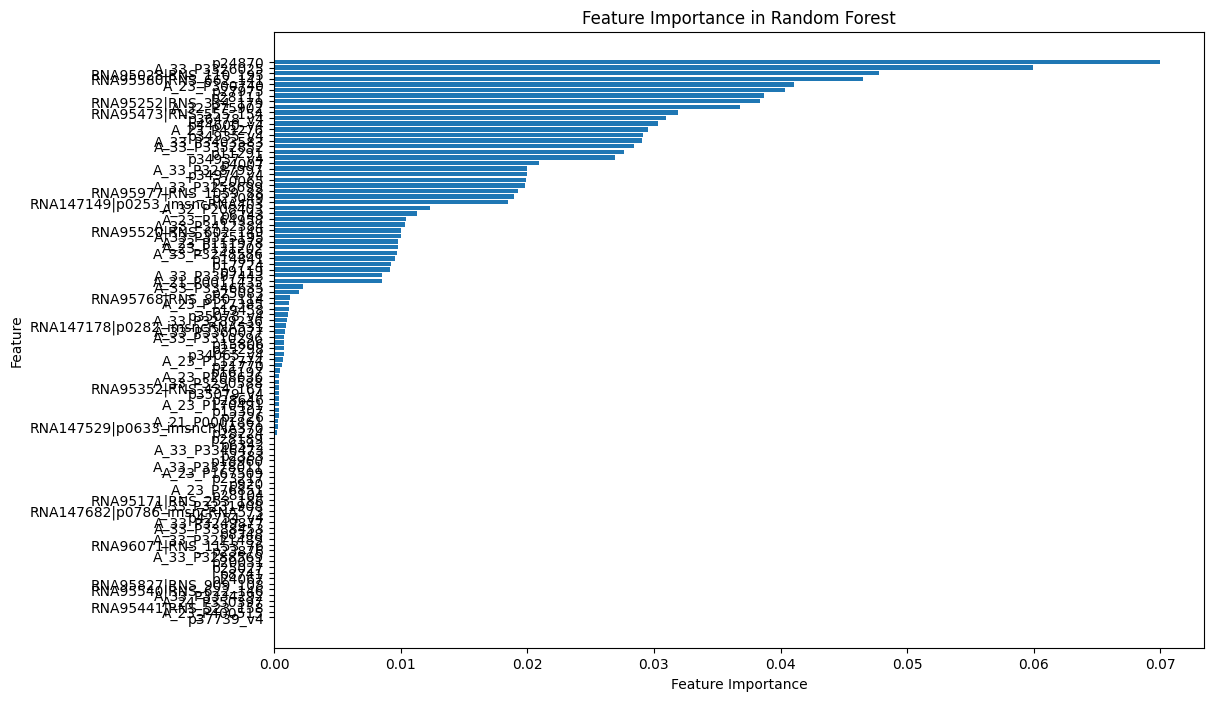

In [33]:
# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

In [35]:
# cross validation

In [36]:
# first try for k = 5

In [37]:
from sklearn.model_selection import cross_val_score, KFold

# assign the model built earlier to variable model
model = rf_classifier_100

# Define the number of folds (k) for cross-validation
k = 5

# Create a cross-validation object (K-Fold cross-validator)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the cross-validation scores
# we use accuracy as the scoring metric here
scores = cross_val_score(model, X_new_100, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print(f"Mean Accuracy: {round(scores.mean()*100, 3)}%")
print(f"Standard Deviation: {round(scores.std()*100, 3)}%")

Cross-Validation Scores: [0.89655172 0.96428571 0.96428571 0.89285714 0.92857143]
Mean Accuracy: 92.931%
Standard Deviation: 3.114%
